# Reading the dataset

This notebook demonstrates reading and using the `.hdf5` dataset.

In [7]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
import astropy.cosmology as astropy_cosmo
from glob import glob
from pyHalo.preset_models import CDM
from pprint import pprint
import h5py

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

# enable use of local modules
repo_dir  = config.machine.repo_dir
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.lenses.strong_lens import StrongLens
from mejiro.plots import plot
from mejiro.helpers import pyhalo, pandeia_input

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

# Open the `hdf5` dataset

In [6]:
# grab the most recent dataset
dataset_paths = glob(f'{config.machine.pipeline_dir}/mejiro_output_*.hdf5')
dataset_paths.sort()
dataset_path = dataset_paths[-1]

In [14]:
with h5py.File(dataset_path, 'r') as hf:
    # get datasets
    images = hf['images'][()]
    # TODO any other datasets?

    # print attributes
    for key in hf.attrs.keys():
        print(f'{key}: {hf.attrs[key]}')

band: ['F106' 'F129' 'F184']
exposure_time: 146
final_pixel_side: 90
grid_oversample: 3
los_normalization: 0.0
max_scene_size: 10.0
n_images: 1019
num_pix: 96
num_samples: 100000
seed: 42
side: 10.56
subhalo_cone: 11.0
suppress_output: True


# View images

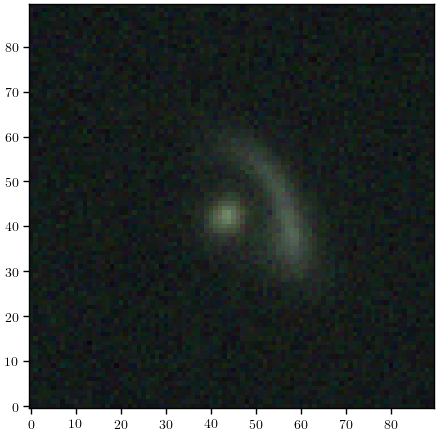

In [17]:
plt.imshow(images[0])
plt.show()